#DIGIT RECOGNITION USING CONVOLUTIONAL NEURAL NETWORKS



In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train_data = pd.read_csv("/train.csv")
test_data = pd.read_csv("/test.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train_data['label']

#Dropping Label Column
X_train = train_data.drop(labels=['label'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


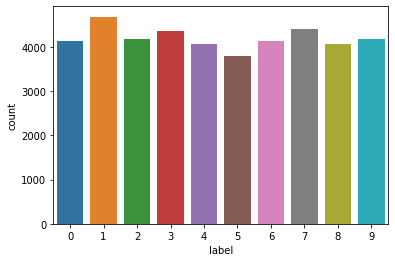

In [5]:
graph = sns.countplot(Y_train)

In [6]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
#Checking for any null or missing values

X_train.isnull().any().describe()
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
#Normalisation

X_train = X_train/255
test_data = test_data/255

In [9]:
#Reshape

X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [10]:
#Label Encoding

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)

In [11]:
#Slitting the dataset for training and validation

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 27)

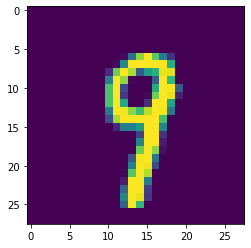

In [12]:
#Sample image

g = plt.imshow(X_train[0][:,:,0])

In [13]:
#Model Building

model = tf.keras.Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation = tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation = tf.nn.softmax))


optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-07, decay = 0.0)


model.compile(optimizer = 'adamax', loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [14]:
#Data Augmentation / Manipulation

data_generator = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset(normalizing)
        samplewise_std_normalization = False,  # divide each input by its std(normalizing)
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  #rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, #image zoom 
        width_shift_range = 0.1,  #shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  #shift images vertically (fraction of total height)
        horizontal_flip = False, #flip images horizontaly
        vertical_flip = False) #flip images vertically


data_generator.fit(X_train)

In [15]:
#Fitting model

if(tf.test.is_built_with_cuda() == True):    #A normal CPU may not be as fast as CUDA for training the data
    print("CUDA Available")
else: 
    print("CUDA not Available")

CUDA Available


In [16]:
epochs = 5
batch_size = 27

In [17]:
Fitted_model = model.fit(data_generator.flow(X_train,Y_train, batch_size = batch_size), epochs = epochs, validation_data = (X_val,Y_val), verbose = 2)

Epoch 1/5
1089/1089 - 511s - loss: 0.4143 - accuracy: 0.8656 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 2/5
1089/1089 - 510s - loss: 0.1423 - accuracy: 0.9575 - val_loss: 0.0682 - val_accuracy: 0.9791
Epoch 3/5
1089/1089 - 509s - loss: 0.1059 - accuracy: 0.9682 - val_loss: 0.0571 - val_accuracy: 0.9826
Epoch 4/5
1089/1089 - 510s - loss: 0.0853 - accuracy: 0.9735 - val_loss: 0.0383 - val_accuracy: 0.9874
Epoch 5/5
1089/1089 - 516s - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0460 - val_accuracy: 0.9860


In [18]:
history = Fitted_model

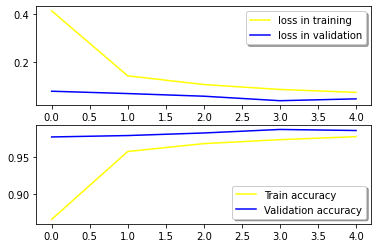

In [19]:
#Accuracy curves (training and validation sets)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='yellow', label="loss in training")
ax[0].plot(history.history['val_loss'], color='b', label="loss in validation",axes =ax[0])
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['accuracy'], color='yellow', label="Train accuracy")
ax[1].plot(history.history['val_accuracy'], color='b',label="Validation accuracy")
legend = ax[1].legend(loc = 'best', shadow = True)

In [20]:
#Predict the values from the validation dataset
Y_pred = model.predict(X_val)

In [21]:
#Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

In [22]:
#Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)

In [23]:
#predict results
results = model.predict(test_data)

#select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name = "Label")

In [24]:
#Convert resultant predictions to a CSV file.
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("DigitRecognition_CNN.csv",index = False)